# Actividad Evaluable 3 - Kmeans


---


Elizabeth Jauregui Zarate
A01253381

# Importing libraries

In [ ]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [ ]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

Get a general 'feel' of the data

In [ ]:
# Print dataset
print(dataset)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width          Flower
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
# Print dataset shape
num_rows = len(dataset.index)
print(f"Number of rows: {num_rows}")

num_columns = len(dataset.columns)
print(f"Number of columns: {num_columns}")

Number of rows: 150
Number of columns: 5


In [ ]:
# Print column names
dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

Drop rows with any missing values

In [ ]:
# Drop na
dataset = dataset.dropna()

Encoding the class label categorical column: from string to num

In [ ]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset["Type_Flower_N"] = dataset.Flower.replace({'Iris-setosa': "0",'Iris-versicolor': "1",'Iris-virginica': "2"})

#Visualize the dataset
dataset

# Drop out non necesary columns
dataset = dataset.drop(columns = ["Flower"])
dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Type_Flower_N
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Scatter plot of the data

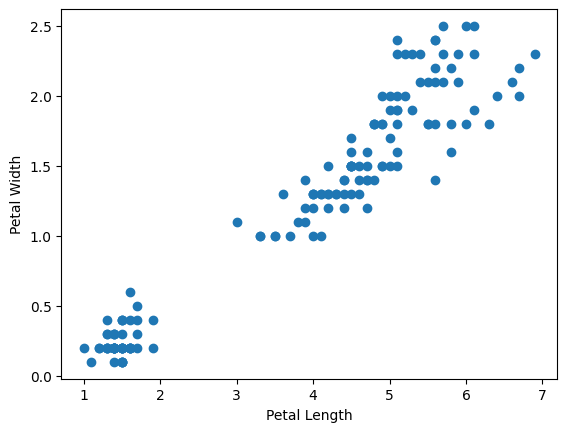

In [ ]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

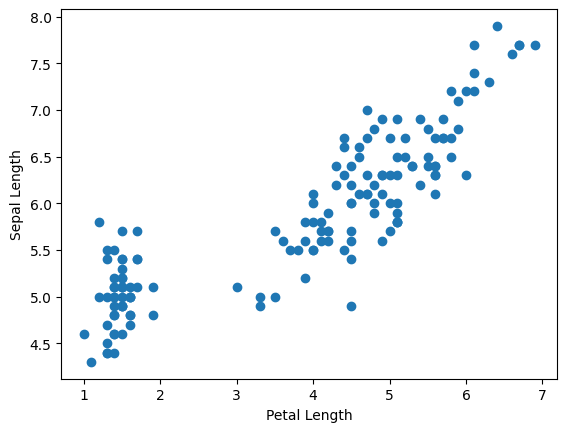

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()

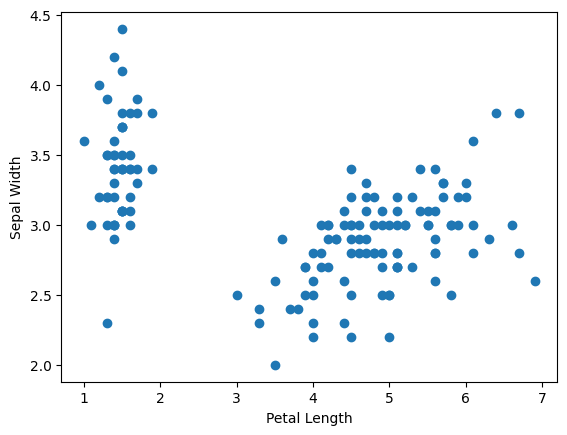

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()

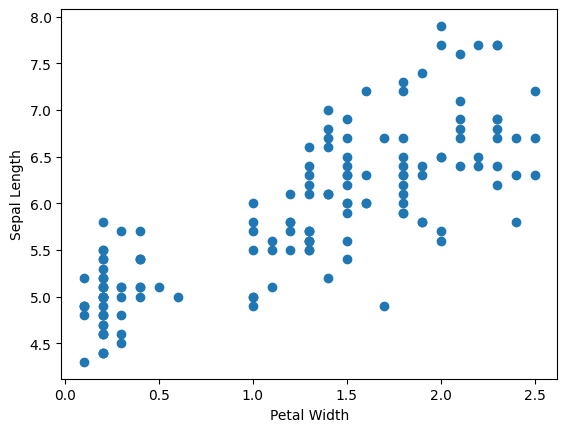

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset.Petal_Width,dataset.Sepal_Length)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

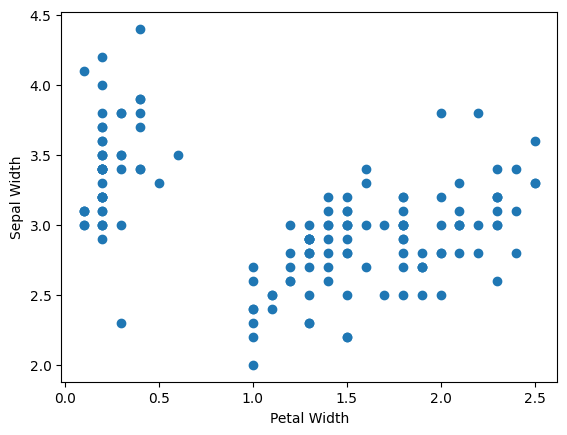

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()

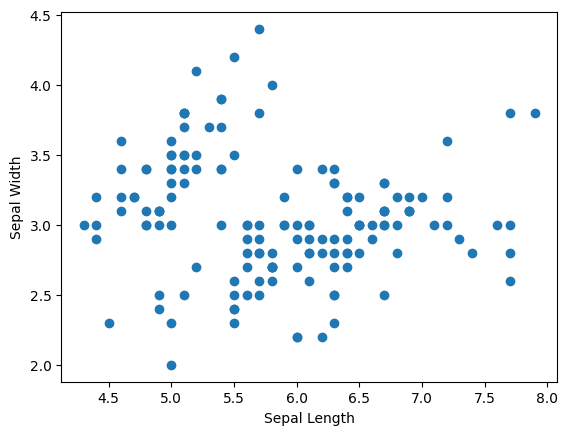

In [ ]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

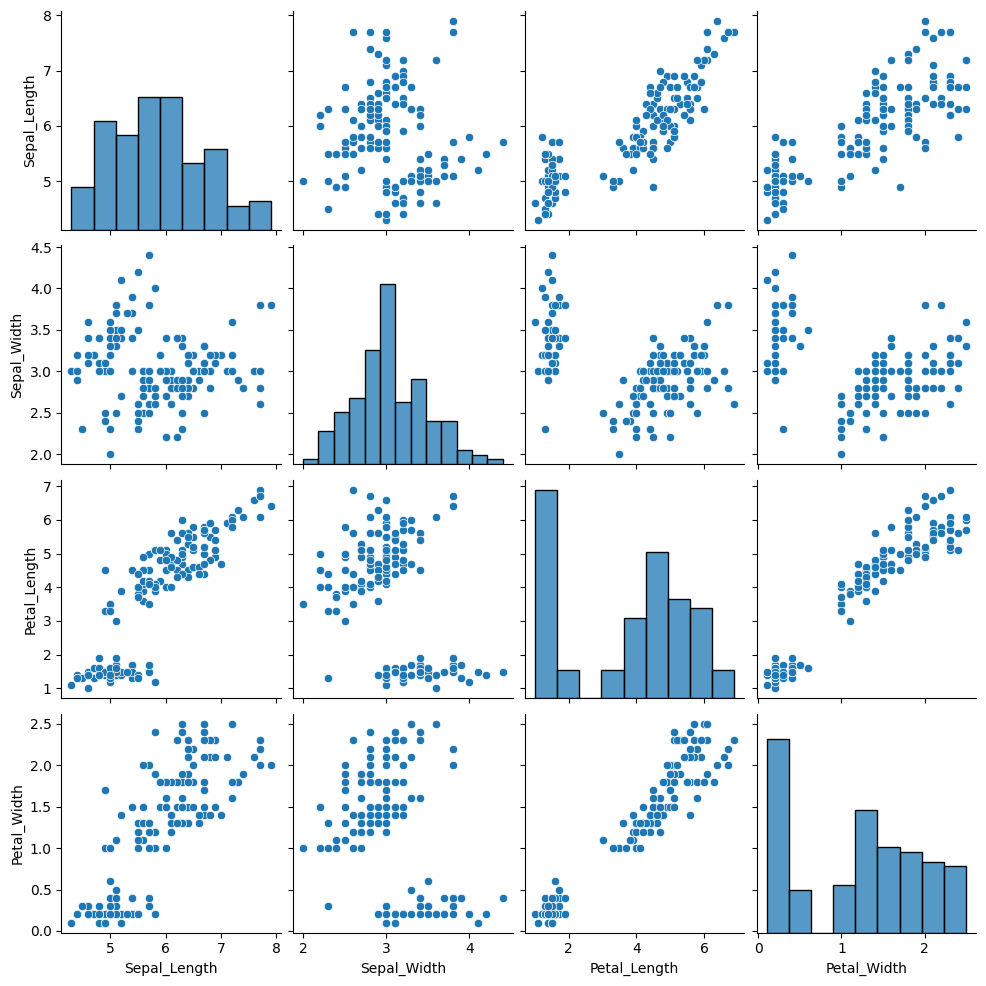

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset)

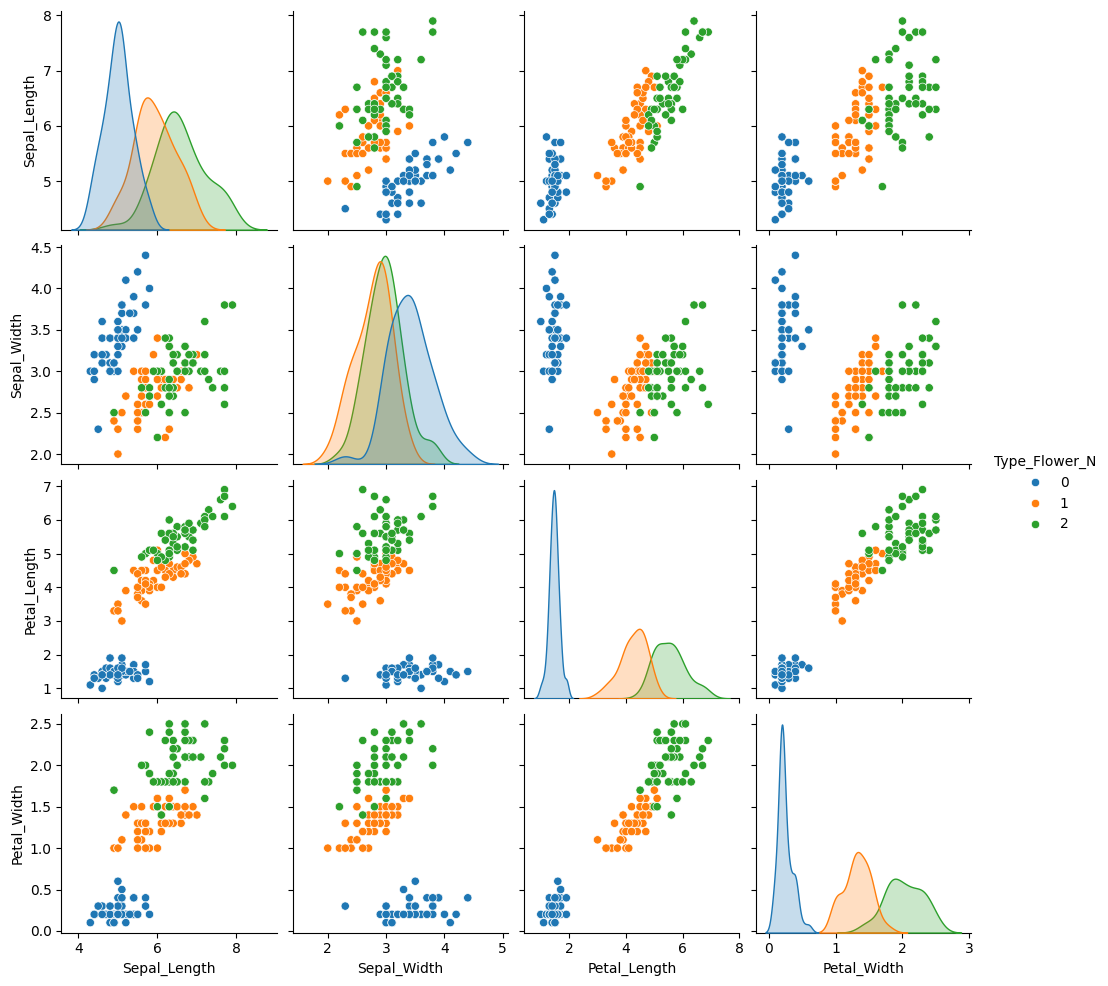

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type) consider hue = Flower
sns.pairplot(dataset, hue = "Type_Flower_N")

Scatter plot of the data asigning each point to the cluster it belongs to

In [ ]:
# Get dataframes for each real cluster
df_0 = dataset[dataset["Type_Flower_N"] == "0"]
df_1 = dataset[dataset["Type_Flower_N"] == "1"]
df_2 = dataset[dataset["Type_Flower_N"] == "2"]

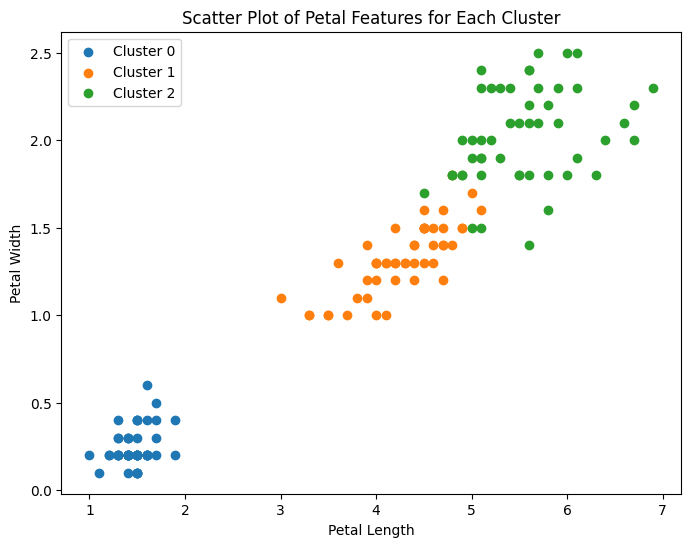

In [ ]:
# Scatter plot of each real cluster for Petal
plt.figure(figsize=(8, 6))

plt.scatter(df_0.Petal_Length, df_0.Petal_Width, label='Cluster 0')
plt.scatter(df_1.Petal_Length, df_1.Petal_Width, label='Cluster 1')
plt.scatter(df_2.Petal_Length, df_2.Petal_Width, label='Cluster 2')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal Features for Each Cluster')
plt.legend()
plt.show()

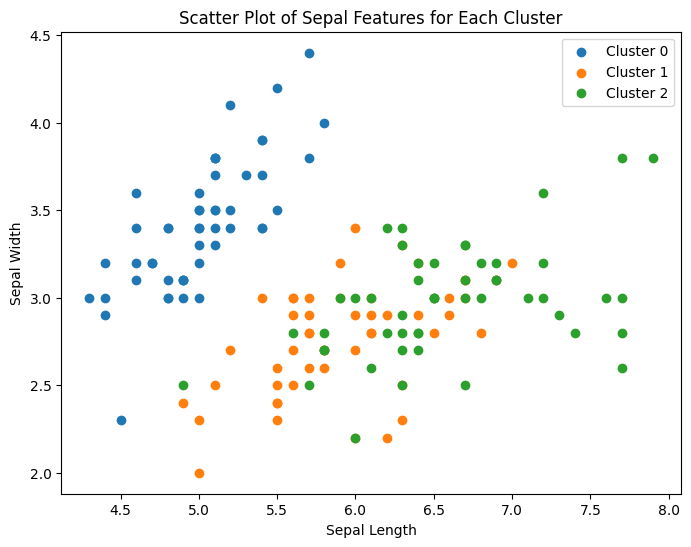

In [ ]:
# Scatter plot of each real cluster for Sepal
plt.figure(figsize=(8, 6))

plt.scatter(df_0.Sepal_Length, df_0.Sepal_Width, label='Cluster 0')
plt.scatter(df_1.Sepal_Length, df_1.Sepal_Width, label='Cluster 1')
plt.scatter(df_2.Sepal_Length, df_2.Sepal_Width, label='Cluster 2')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Features for Each Cluster')
plt.legend()
plt.show()

# Get variables X and labels y

In [ ]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Type_Flower_N"].values

In [ ]:
# Understand the data X
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(150, 4)


In [ ]:
# Understand the data y
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(150,)


In [ ]:
# Calculate the number of observations in the dataset
num_observations = len(dataset.index)
print(f"Number of observations: {num_observations}")

Number of observations: 150


In [ ]:
# Calculate the number of observations for class 0
num_observations_class_0 = len(df_0.index)
print(f"Number of observations for class 0: {num_observations_class_0}")

Number of observations for class 0: 50


In [ ]:
# Calculate the number of observations for class 1
num_observations_class_1 = len(df_1.index)
print(f"Number of observations for class 1: {num_observations_class_1}")

Number of observations for class 1: 50


In [ ]:
# Calculate the number of observations for class 2
num_observations_class_2 = len(df_2.index)
print(f"Number of observations for class 2: {num_observations_class_2}")

Number of observations for class 2: 50


#Train a classifier
Train the classification model

In [ ]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression(max_iter=1000)

# Fit the model to the training data
classifier.fit(X, y)


LogisticRegression(max_iter=1000)

#Predict the class of a new observation

In [ ]:
# Get a new observation
#xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew

array([[5.5, 2.5, 3.5, 1.5]])

In [ ]:
# Make the prediction using xnew
ynew = classifier.predict(xnew)

# Get the predicted class
print(ynew)

['1']


#Evaluation of a classifier
Split data in train and test sets
Holdout: spliting the dataset in train and test sets

In [ ]:
# Import sklearn train_test_split:
from sklearn.model_selection import train_test_split

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Number of observations in the train set
print(len(X_train))

120


In [ ]:
# Number of observations of each class in the train set
print(np.unique(y_train, return_counts=True))


(array(['0', '1', '2'], dtype=object), array([40, 41, 39]))


In [ ]:
# Number of observations in the test set
print(len(X_test))

30


In [ ]:
# Number of observations of each class in the test set
print(np.unique(y_test, return_counts=True))

(array(['0', '1', '2'], dtype=object), array([10,  9, 11]))


#Train the classification model

In [ ]:
# Initialize the classifier
classifier = LogisticRegression(max_iter=1000)

# Fit the model to the training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#Test the classification model


In [ ]:
# Make the predictions using the test set
y_pred = classifier.predict(X_test)

# Explore real and predicted labels:
print(y_test)
print(y_pred)

['1' '0' '2' '1' '1' '0' '1' '2' '1' '1' '2' '0' '0' '0' '0' '1' '2' '1'
 '1' '2' '0' '2' '0' '2' '2' '2' '2' '2' '0' '0']
['1' '0' '2' '1' '1' '0' '1' '2' '1' '1' '2' '0' '0' '0' '0' '1' '2' '1'
 '1' '2' '0' '2' '0' '2' '2' '2' '2' '2' '0' '0']


#Compute the acurracy


In [ ]:
# Define a function to compute accuracy
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


In [ ]:
# Calculate total accuracy
print(accuracy(y_test, y_pred))

1.0


In [ ]:
# Calculate total accuracy using sklearn.metrics:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
# Compute accuracy for class 0
class_0_indices = np.where(y_test == '0')
y_test_class_0 = y_test[class_0_indices]
y_pred_class_0 = y_pred[class_0_indices]

accuracy_class_0 = accuracy_score(y_test_class_0, y_pred_class_0)
print(f"Accuracy for class 0: {accuracy_class_0}")

Accuracy for class 0: 1.0


In [ ]:
# Compute accuracy for class 1
class_1_indices = np.where(y_test == '1')
y_test_class_1 = y_test[class_1_indices]
y_pred_class_1 = y_pred[class_1_indices]

accuracy_class_1 = accuracy_score(y_test_class_1, y_pred_class_1)
print(f"Accuracy for class 1: {accuracy_class_1}")

Accuracy for class 1: 1.0


In [ ]:
# Compute accuracy for class 2
class_2_indices = np.where(y_test == '2')
y_test_class_2 = y_test[class_2_indices]
y_pred_class_2 = y_pred[class_2_indices]

accuracy_class_2 = accuracy_score(y_test_class_2, y_pred_class_2)
print(f"Accuracy for class 2: {accuracy_class_2}")

Accuracy for class 2: 1.0


#Confussion matrix


In [ ]:
# Compute confussion matrix (normalized confusion matrix):
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

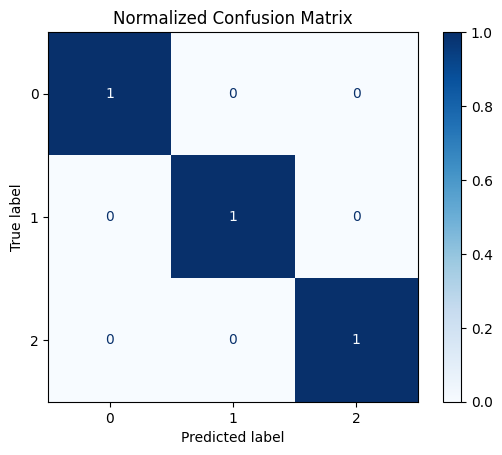

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.show()

#Activity
1. Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?
  - Usar las cuatro variables y las dos variables de pétalos, provee la clasificación más exacta, esto porque las variables de los pétalos muestran variaciones más significativas entre los tipos de flores.
2. Using the four variables, try with two classifiers. Which provides the best performance?

In [2]:
#Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Cargar el conjunto de datos Iris
colnames = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Flower"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url, header=None, names=colnames)

#-limpiar los datos
dataset = dataset.dropna()
dataset["Type_Flower_N"] = dataset.Flower.replace({'Iris-setosa': "0", 'Iris-versicolor': "1", 'Iris-virginica': "2"})
dataset = dataset.drop(columns=["Flower"])

# Definir las características (X) y las etiquetas (y)
# Variables
X_all = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
X_train_petal, X_test_petal, _, _ = train_test_split(X_petal, y, test_size=0.2, random_state=42)
X_train_sepal, X_test_sepal, _, _ = train_test_split(X_sepal, y, test_size=0.2, random_state=42)

# Entrenar y evaluar los clasificadores para cada conjunto de variables
classifiers = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(), SVC()]
classifier_names = ["Regresión Logística", "Árbol de Decisión"]
feature_sets = [(X_train_all, X_test_all, "Todas las variables")]

for classifier, classifier_name in zip(classifiers, classifier_names):
    for X_train, X_test, feature_set_name in feature_sets:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Precisión del {classifier_name} con {feature_set_name}: {accuracy}")

Precisión del Regresión Logística con Todas las variables: 1.0
Precisión del Árbol de Decisión con Todas las variables: 1.0


Ambos modelos de predicción (Regresión Logística y Árbol de Decisiones) resultan pertinentes al tener el mismo porcentaje de exactitud al utilizar las cuatro variables.